In [1]:
import sympy as sp
import numpy as np
import scipy

In [6]:
A = 0.25358522562474695
B = 0.6296763877330811
t, x = sp.symbols("t, x")
integrand = (x - t) ** 3 * sp.sin(2 * t) / (1 + 0.3 * t**2)
analytic_expr = (
    (B - A) / 2 * x**2 - B / 6 * x**3 + sp.Integral(integrand, (t, 0, x)) / 6
)

def numerical_eval(x):
    integrand = lambda t: (x - t) ** 3 * np.sin(2 * t) / (1 + 0.3 * t**2)
    integral = scipy.integrate.quad(integrand, 0, x)
    if integral[0] != 0.0:
        print(integral[1] / integral[0])
    else:
        print(integral[1])
    return (B - A) / 2 * x**2 - B / 6 * x**3 + integral[0] / 6


def numerical_eval_2(x):
    integrand = lambda t: (- t + x) ** 3 * np.sin(2 * t) / (0.3 * t**2 + 1)
    integral = scipy.integrate.quad(integrand, 0, x)
    if integral[0] != 0.0:
        print(integral[1] / integral[0])
    else:
        print(integral[1])
    return (B - A) / 2 * x**2 - B / 6 * x**3 + integral[0] / 6

x_eval = np.linspace(0, 1, 500)

lamb = np.vectorize(sp.lambdify(x, analytic_expr, modules=["scipy", "numpy"]))
y_lamb = lamb(x_eval)

num = np.vectorize(numerical_eval)
y_num = num(x_eval)

num_2 = np.vectorize(numerical_eval_2)
y_num_2 = num_2(x_eval)

np.nanmax((y_lamb - y_num) / y_num)

0.0
0.0
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251564e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251567e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251567e-14
1.1102230246251564e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1102230246251565e-14
1.1

/tmp/ipykernel_342968/1483046366.py:39: RuntimeWarning: invalid value encountered in divide
  np.nanmax((y_lamb - y_num) / y_num)


np.float64(1.479730469889538e-15)

In [4]:
help(lamb)

Help on vectorize in module numpy:

_lambdifygenerated = <numpy.vectorize object>
    Created with lambdify. Signature:

    func(x)

    Expression:

    -0.10494606462218*x**3 + 0.188045581054167*x**2 + Integral((-t +...

    Source code:

    def _lambdifygenerated(x):
        return -0.10494606462218*x**3 + 0.188045581054167*x**2 + quad(lambda t: (-t + x)**3*sin(2*t)/(0.3*t**2 + 1), 0, x)[0]


    Imported modules:

    from scipy.integrate import quad



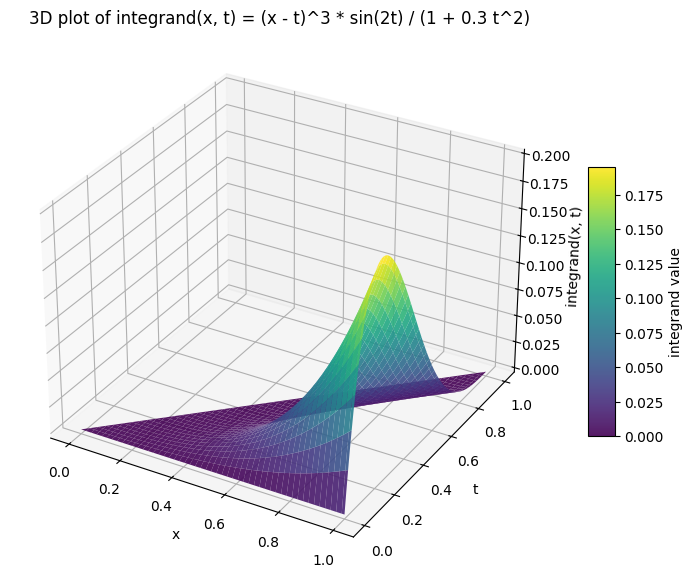

In [3]:
import matplotlib.pyplot as plt

# 3d plot of x, t, integrand(x, t)
from mpl_toolkits.mplot3d import Axes3D

# Create a grid of x and t values
x_vals = np.linspace(0, 1, 100)
t_vals = np.linspace(0, 1, 100)
X, T = np.meshgrid(x_vals, t_vals)

# Compute the integrand for each (x, t), but only where t <= x
integrand_vals = (X - T) ** 3 * np.sin(2 * T) / (1 + 0.3 * T**2)
integrand_vals = np.where(T <= X, integrand_vals, np.nan)  # mask out t > x

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, T, integrand_vals, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('integrand(x, t)')
ax.set_title('3D plot of integrand(x, t) = (x - t)^3 * sin(2t) / (1 + 0.3 t^2)')

fig.colorbar(surf, shrink=0.5, aspect=10, label='integrand value')
plt.show()
